In [2]:
#importing tools and lib 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import kagglehub
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,calinski_harabasz_score
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.cluster import DBSCAN
from sklearn.pipeline import make_pipeline

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/customer-segmentation-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\laksh\.cache\kagglehub\datasets\yasserh\customer-segmentation-dataset\versions\1


In [3]:
df = pd.read_excel('C:\\Users\\laksh\\.cache\\kagglehub\\datasets\\yasserh\\customer-segmentation-dataset\\versions\\1\\Online Retail.xlsx')

In [4]:
df.dropna(inplace=True)
df.drop(df[df.duplicated()].index,axis=0,inplace=True)


In [5]:
le = LabelEncoder()

categories = ['InvoiceNo','StockCode','Description','InvoiceDate','CustomerID','Country']

for category in categories:
    
        df[category] = le.fit_transform(df[category].astype(str))

In [6]:
df.drop('InvoiceDate',axis=1,inplace=True)

In [7]:
wrong_data = df[df['Quantity']<0].index
wrong_data
df.drop(index=wrong_data,axis=0,inplace=True)
df.reset_index(drop=True,inplace=True)


In [8]:
scaler=StandardScaler()
scaled_df=scaler.fit_transform(df)
scaled_df=pd.DataFrame(scaled_df,columns=df.columns)

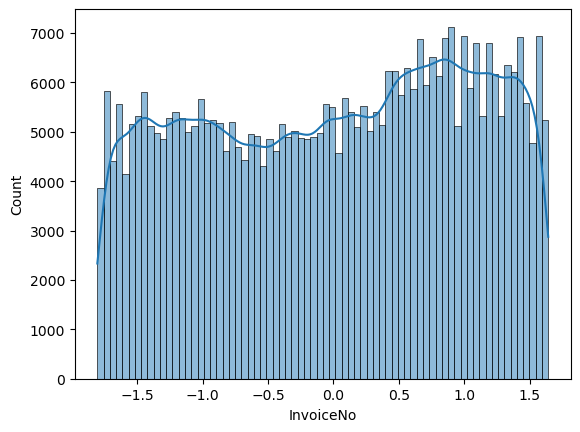

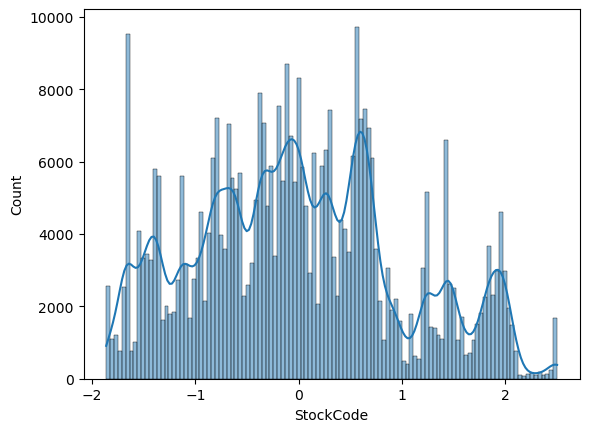

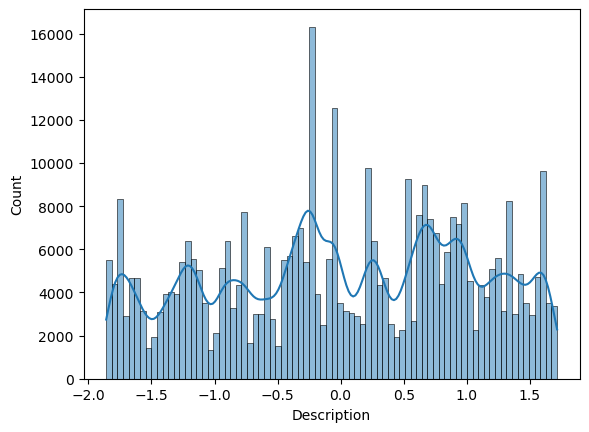

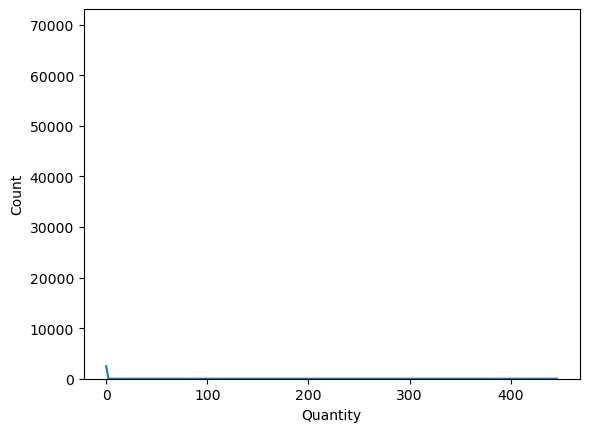

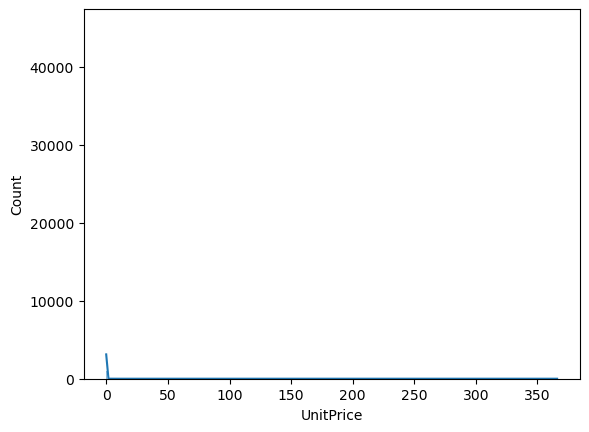

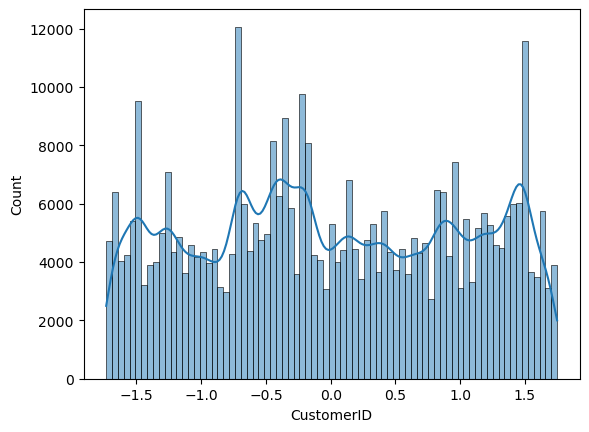

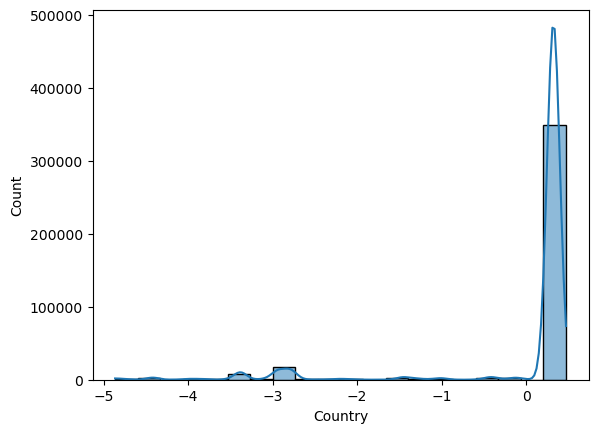

In [9]:
for col in scaled_df.columns:
    plt.figure()
    sns.histplot(scaled_df[col],kde=True)

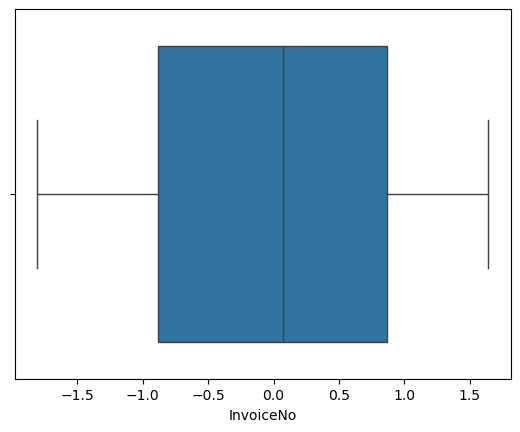

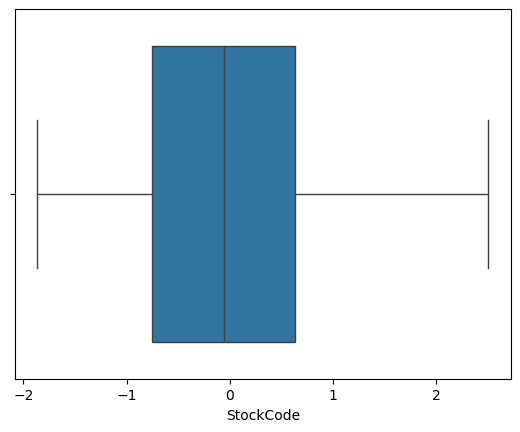

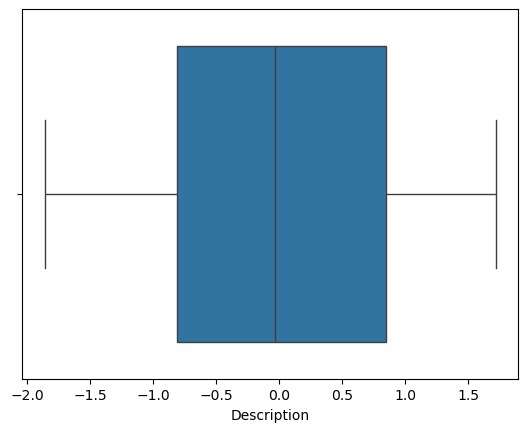

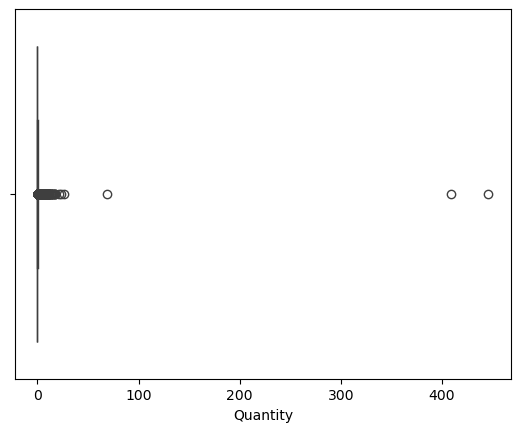

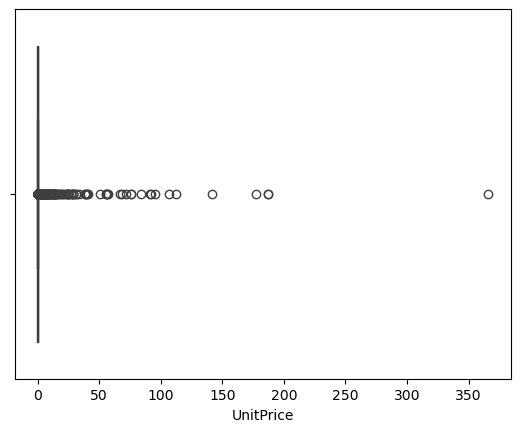

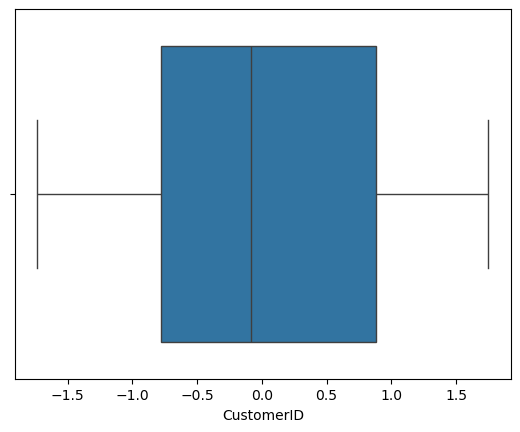

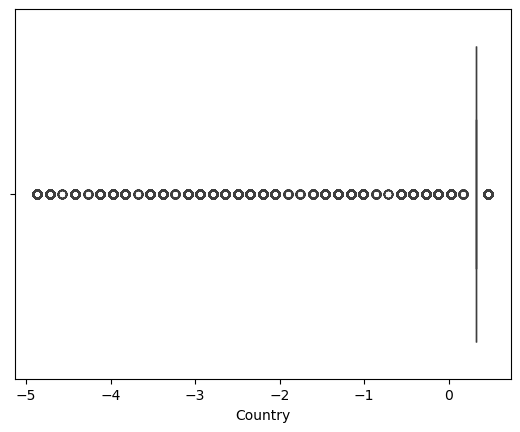

In [10]:
for col in scaled_df.columns:
    plt.figure()
    sns.boxplot(x=scaled_df[col])



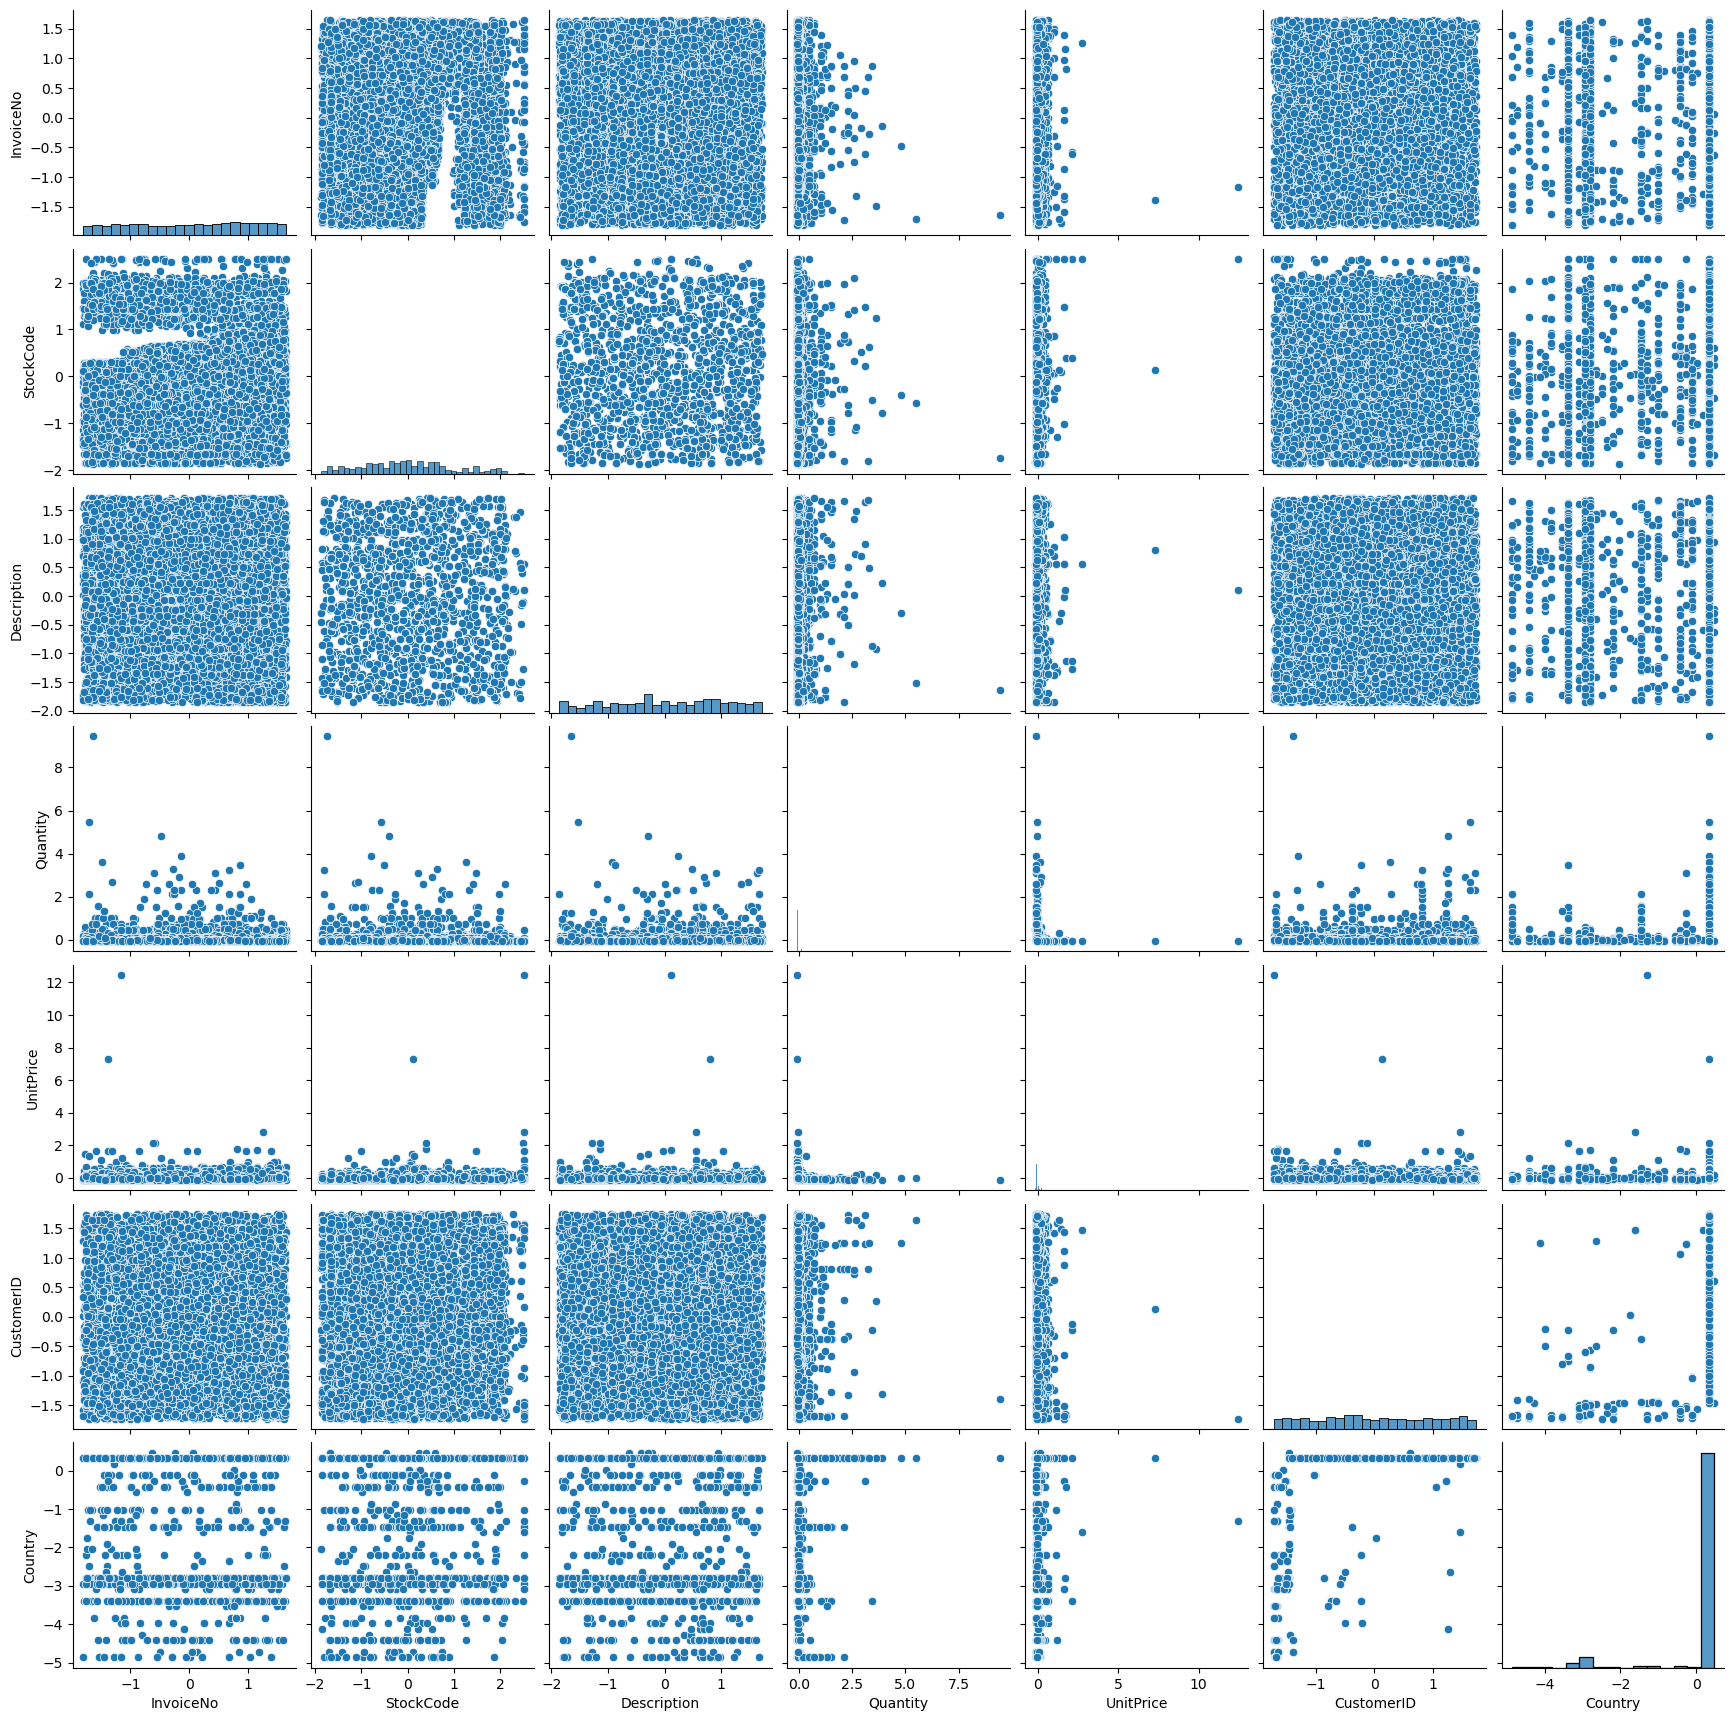

In [11]:
sns.pairplot(scaled_df.sample(10000))


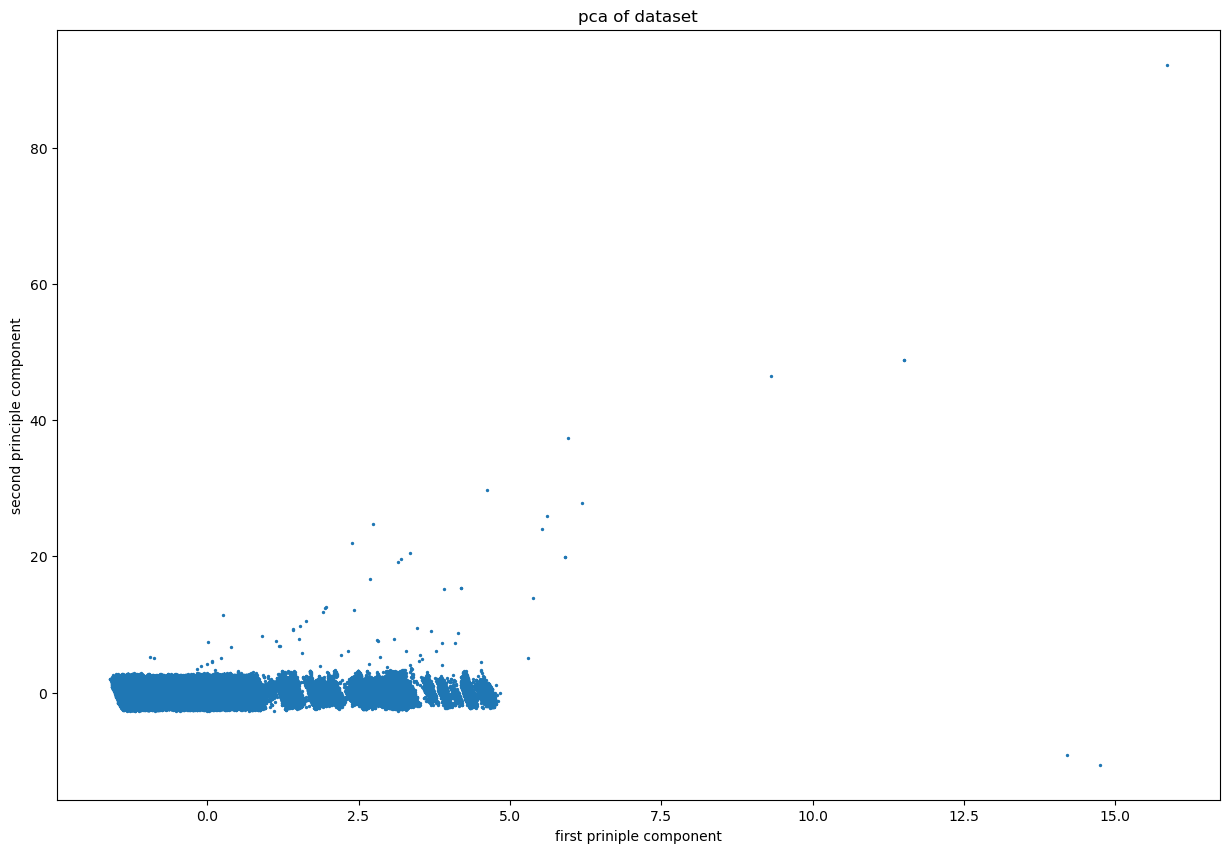

In [12]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df)

plt.figure(figsize=(15,10))
plt.scatter(pca_result[:,0],pca_result[:,1],s = 2)
plt.title('pca of dataset')
plt.xlabel('first priniple component')
plt.ylabel('second principle component')
plt.show()

In [13]:
out=IsolationForest(contamination=0.1)

In [14]:
scaled_df['out']=out.fit_predict(scaled_df)

In [15]:
df.drop(scaled_df[scaled_df['out']==-1].index,axis=0,inplace=True)
scaled_df.drop(scaled_df[scaled_df['out']==-1].index,axis=0,inplace=True)

In [16]:
scaled_df.reset_index(inplace=True)
scaled_df.drop('index',axis=1,inplace=True)
scaled_df.drop('out',axis=1,inplace=True)


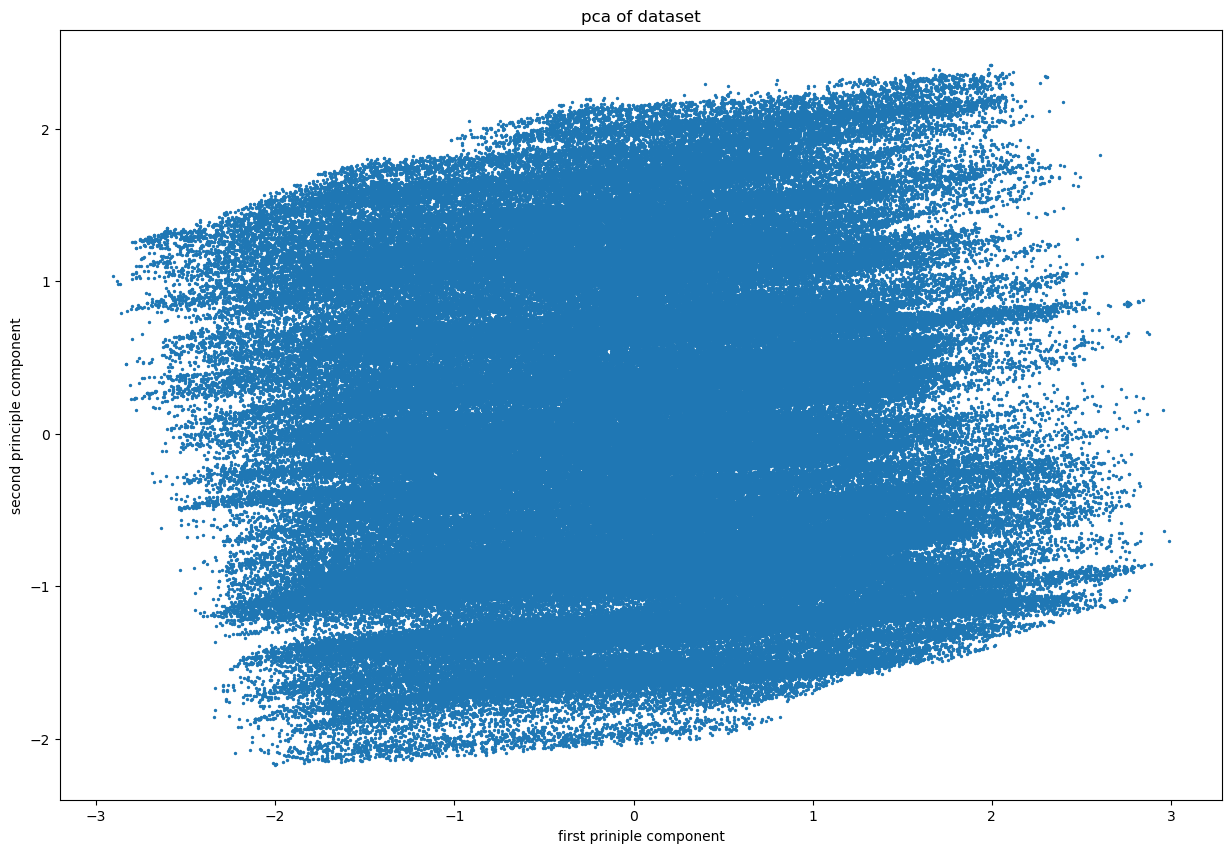

In [17]:
pca_result = pca.fit_transform(scaled_df)

plt.figure(figsize=(15,10))
plt.scatter(pca_result[:,0],pca_result[:,1],s = 2)
plt.title('pca of dataset')
plt.xlabel('first priniple component')
plt.ylabel('second principle component')
plt.show()

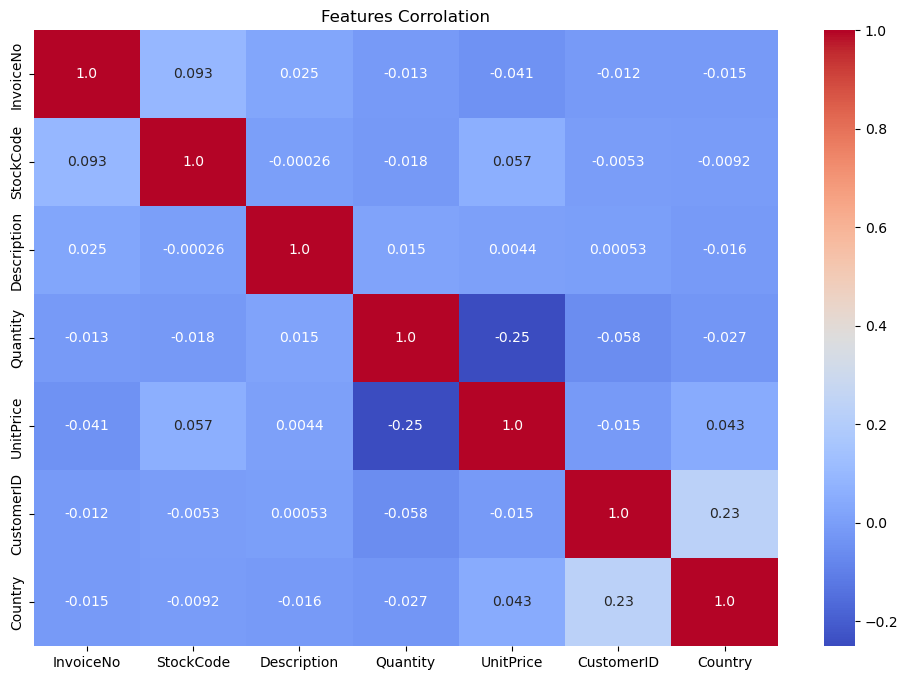

In [18]:
plt.figure(figsize = (12,8))
sns.heatmap(scaled_df.corr(),annot=True,cmap='coolwarm', fmt = '0.2')
plt.title('Features Corrolation')
plt.show()

In [19]:
sample_Scaled_df=scaled_df.sample(100000)

In [21]:
silhoutte=[]
calinski=[]
# Try more cluster values for a better elbow
cluster_range = range(2,13)

for n in cluster_range:
    model = KMeans(n_clusters=n, random_state=42,verbose=1)
    model.fit(sample_Scaled_df)
    calinski.append(calinski_harabasz_score(sample_Scaled_df,model.labels_))
    silhoutte.append(silhouette_score(sample_Scaled_df,model.labels_))


Initialization complete
Iteration 0, inertia 426882.227035555.
Iteration 1, inertia 343912.2765801296.
Iteration 2, inertia 338343.08667216846.
Iteration 3, inertia 335337.8639620212.
Iteration 4, inertia 333614.26157239015.
Iteration 5, inertia 332642.58059069875.
Iteration 6, inertia 332196.4378068051.
Iteration 7, inertia 331992.5149510567.
Iteration 8, inertia 331908.0510848198.
Iteration 9, inertia 331873.3227132365.
Iteration 10, inertia 331860.8210099618.
Converged at iteration 10: center shift 5.778976001941462e-05 within tolerance 5.831827999213736e-05.
Initialization complete
Iteration 0, inertia 346965.37196739065.
Iteration 1, inertia 296179.9843785974.
Iteration 2, inertia 291644.0429576122.
Iteration 3, inertia 290123.1432893942.
Iteration 4, inertia 289416.76101418084.
Iteration 5, inertia 288909.16824355675.
Iteration 6, inertia 288535.93003711867.
Iteration 7, inertia 288293.9315619061.
Iteration 8, inertia 288151.6627108667.
Iteration 9, inertia 288073.76865104475.
It

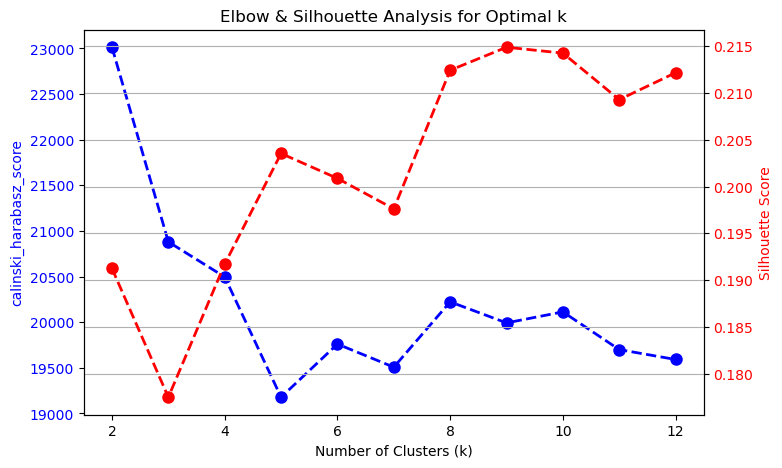

In [30]:
fig, ax1 = plt.subplots(figsize=(8, 5))

# Plot Inertia
ax1.plot(cluster_range, calinski, color='blue', marker='o', linestyle='--', linewidth=2, markersize=8)
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('calinski_harabasz_score', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for Silhouette
ax2 = ax1.twinx()
ax2.plot(cluster_range, silhoutte, color='red', marker='o', linestyle='--', linewidth=2, markersize=8)
ax2.set_ylabel('Silhouette Score', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Elbow & Silhouette Analysis for Optimal k')
plt.grid(True)
plt.show()


In [31]:
sampled_df = scaled_df.sample(n=100000, random_state=42)

In [34]:
eps_values = np.linspace(0.4, 0.7, 15)
silhouette_scores = []
calinski_scores = []
n_clusters_list = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5, n_jobs=-1)
    dbscan.fit(sampled_df)
    labels = dbscan.labels_

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_clusters_list.append(n_clusters)

    # Avoid scoring for single-cluster or noise-only results
    if n_clusters > 1:
        sil_score = silhouette_score(sampled_df, labels)
        cal_score = calinski_harabasz_score(sampled_df, labels)
    else:
        sil_score = np.nan
        cal_score = np.nan

    silhouette_scores.append(sil_score)
    calinski_scores.append(cal_score)




'\neps_values = np.linspace(0.4, 0.7, 15)\nsilhouette_scores = []\ncalinski_scores = []\nn_clusters_list = []\n\nfor eps in eps_values:\n    dbscan = DBSCAN(eps=eps, min_samples=5, n_jobs=-1)\n    dbscan.fit(sampled_df)\n    labels = dbscan.labels_\n\n    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)\n    n_clusters_list.append(n_clusters)\n\n    # Avoid scoring for single-cluster or noise-only results\n    if n_clusters > 1:\n        sil_score = silhouette_score(sampled_df, labels)\n        cal_score = calinski_harabasz_score(sampled_df, labels)\n    else:\n        sil_score = np.nan\n        cal_score = np.nan\n\n    silhouette_scores.append(sil_score)\n    calinski_scores.append(cal_score)'

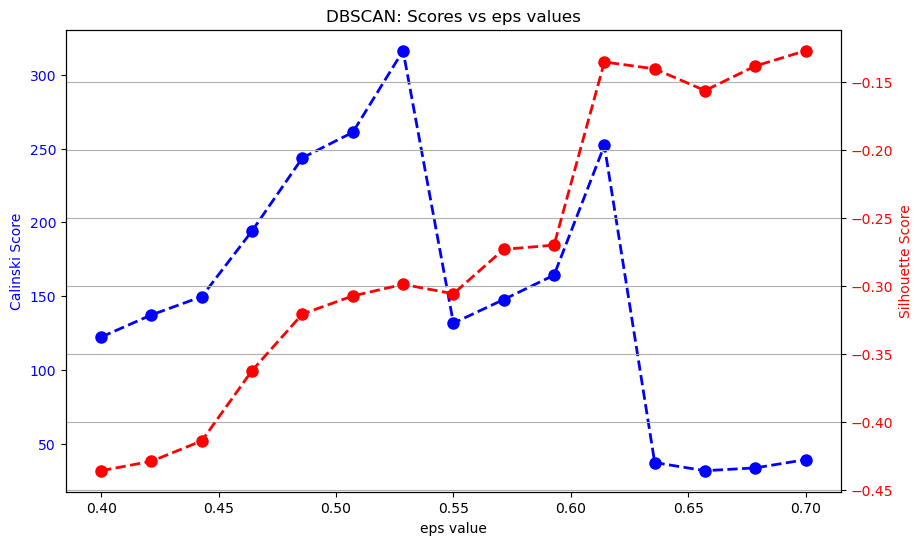

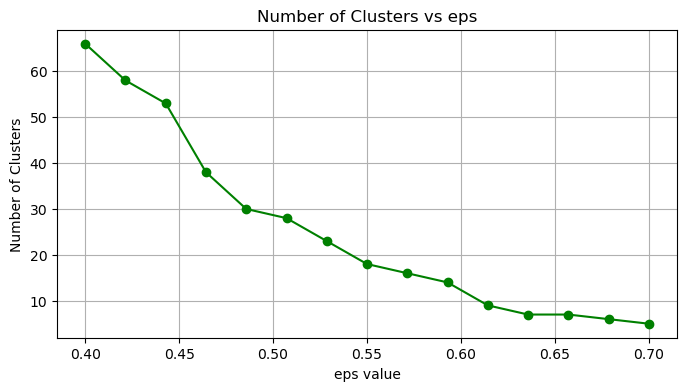

eps: 0.40 | Clusters: 66 | Silhouette: -0.4356 | Calinski: 122.23
eps: 0.42 | Clusters: 58 | Silhouette: -0.4287 | Calinski: 137.24
eps: 0.44 | Clusters: 53 | Silhouette: -0.4137 | Calinski: 149.64
eps: 0.46 | Clusters: 38 | Silhouette: -0.3620 | Calinski: 194.21
eps: 0.49 | Clusters: 30 | Silhouette: -0.3205 | Calinski: 243.72
eps: 0.51 | Clusters: 28 | Silhouette: -0.3072 | Calinski: 260.99
eps: 0.53 | Clusters: 23 | Silhouette: -0.2987 | Calinski: 316.30
eps: 0.55 | Clusters: 18 | Silhouette: -0.3056 | Calinski: 131.66
eps: 0.57 | Clusters: 16 | Silhouette: -0.2729 | Calinski: 147.65
eps: 0.59 | Clusters: 14 | Silhouette: -0.2699 | Calinski: 164.19
eps: 0.61 | Clusters: 9 | Silhouette: -0.1353 | Calinski: 252.12
eps: 0.64 | Clusters: 7 | Silhouette: -0.1403 | Calinski: 37.16
eps: 0.66 | Clusters: 7 | Silhouette: -0.1563 | Calinski: 31.62
eps: 0.68 | Clusters: 6 | Silhouette: -0.1382 | Calinski: 33.55
eps: 0.70 | Clusters: 5 | Silhouette: -0.1270 | Calinski: 39.11


In [35]:
# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(eps_values, calinski_scores, color='blue', marker='o', linestyle='--', linewidth=2, markersize=8, label='Calinski Score')
ax1.set_xlabel('eps value')
ax1.set_ylabel('Calinski Score', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create second y-axis for silhouette s
ax2 = ax1.twinx()
ax2.plot(eps_values, silhouette_scores, color='red', marker='o', linestyle='--', linewidth=2, markersize=8, label='Silhouette Score')
ax2.set_ylabel('Silhouette Score', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('DBSCAN: Scores vs eps values')
plt.grid(True)
plt.show()
plt.figure(figsize=(8, 4))
plt.plot(eps_values, n_clusters_list, marker='o', color='green')
plt.title('Number of Clusters vs eps')
plt.xlabel('eps value')
plt.ylabel('Number of Clusters')
plt.grid(True)
plt.show()


# Optional: Print result summary
for i, eps in enumerate(eps_values):
    print(f"eps: {eps:.2f} | Clusters: {n_clusters_list[i]} | Silhouette: {silhouette_scores[i]:.4f} | Calinski: {calinski_scores[i]:.2f}")

In [36]:
model=KMeans(n_clusters=9)

In [38]:
df['Label']=model.fit_predict(scaled_df)

In [41]:
df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Label
0,0,3249,3716,6,2.55,4048,35,7
1,0,2649,3724,6,3.39,4048,35,1
2,0,2855,861,8,2.75,4048,35,7
3,0,2803,1813,6,3.39,4048,35,7
4,0,2802,2776,6,3.39,4048,35,7
...,...,...,...,...,...,...,...,...
392710,18533,2150,2976,4,3.75,2562,35,8
392711,18533,1980,3889,12,0.95,2562,35,3
392712,18533,1332,1174,12,1.95,2562,35,6
392713,18534,964,1836,8,2.95,587,35,0


<Axes: xlabel='Label', ylabel='count'>

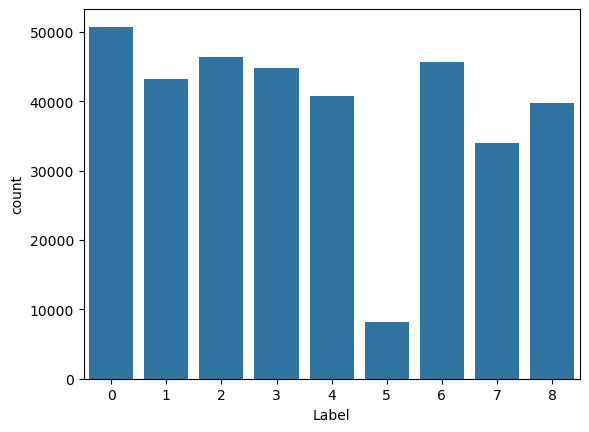

In [46]:
sns.countplot(data=df, x='Label')


In [48]:
df.to_csv("clustered_output.csv", index=False)

